# Data Cleaning Project: Clean and Analyze Employee Exit Surveys

In this guided project, I will practice cleaning a data set using vectorized strings, handling missing data, transforming data and combining data.

The data sets deal with employee exit surveys from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The main goals to answer and analyze in this project is:

1. Are employees who worked for a short period of time resigning due to some kind of dissatisfaction? What about long term employees?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [50]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
print(dete_survey.info())
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
print(dete_survey.isnull().sum())
print(dete_survey['Job dissatisfaction'].value_counts())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In the DETE survey, there are a lot of contributing factors that the survey discussed in regards to employee satisfaction. The most telling as to why employees leave would be the job and department dissatisfaction. Out of the 822 employees, there were 89 who were dissatisfied, about 10%. 

As far as missing values, there are quite a few rows that have a majority of the values missing, such as the last group of rows (Aboriginal, Disability, etc). These may end up being dropped, but first I will investigate the missing values in more detail.

In [5]:
print(tafe_survey.info())
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
print(tafe_survey.isnull().sum())
print(tafe_survey['Reason for ceasing employment'].value_counts())

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In the TAFE survey, it gives a more overall view of employee satisfaction and focuses on more specific reasons as to why employees are dissatisfied. In the reason for ceasing employment category, the main reason was due to resignation. 

There was a good amount of missing data in the contributing factors (265 out of 702) and the main factor(589 our of 702), possibly due to the hesitation on saying exactly why they are choosing to leave or resign. Some of the rows may need to be dropped, but I will also investigate the rows a bit further first.

In [7]:
#Identifying missing values and dropping unnecessary columns
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Started')

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [9]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [10]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

I decided to delete the views and introduction and workplace topcs columns from DETE survey since they were not relevant. Same goes for the introduction and workplace topics columns in the TAFE survey.

In [11]:
#now to make the column names uniform so that we can eventually combine the columns
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ","_").str.strip().str.lower()

In [12]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
#rename some of the columns n TAFE data set
renamed = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=renamed)

In [14]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

I updated the names of the columns in TAFE survey so that when the data is combined they match up, and to shorten the column names to make them easier to read and index. The contributing factors columns will eventually be taken care of.

In [15]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
#create copy of dataframes to avoid error
tafe_res = tafe_survey_updated.copy()

#make the resignation value into one category
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split("-").str[0]
dete_res = dete_survey_updated.copy()

dete_resignations = dete_res[dete_res['separationtype'] == 'Resignation']
tafe_resignations = tafe_res[tafe_res['separationtype'] == 'Resignation']

In [18]:
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

The main column we want to focus on is the `separationtype` column. In the DETE survey, it contains values multiple values for the resignation category, so I combined them into one single category to compare and combine with the TAFE survey. The resignations for each survey are separated into their own dataframes.

In [19]:
#Check for inconsistencies. Never assume data is not corrupt in some way!
#check the dates for any inconsistencies

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split("/").str[-1]
#if cannot delete row from series, just filter it out
dete_resignations['cease_date'] = dete_resignations['cease_date'][dete_resignations['cease_date'] != 'Not Stated']
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')
dete_resignations['cease_date'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [20]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [21]:
dete_resignations['dete_start_date'].value_counts()

Not Stated    28
2011          24
2008          22
2012          21
2007          21
2010          17
2005          15
2004          14
2009          13
2006          13
2013          10
2000           9
1999           8
1996           6
2002           6
1992           6
1998           6
2003           6
1994           6
1997           5
1993           5
1990           5
1980           5
1989           4
1991           4
1988           4
1995           4
2001           3
1986           3
1985           3
1983           2
1974           2
1976           2
1973           1
1971           1
1977           1
1984           1
1987           1
1972           1
1963           1
1975           1
1982           1
Name: dete_start_date, dtype: int64

In [22]:
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'][dete_resignations['dete_start_date'] != 'Not Stated']
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

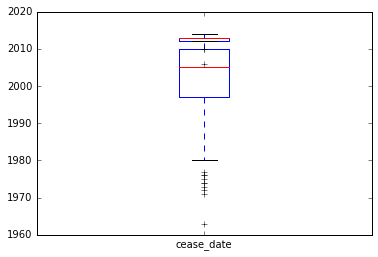

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
dete_resignations['dete_start_date'].plot(kind='box')
dete_resignations['cease_date'].plot(kind='box')

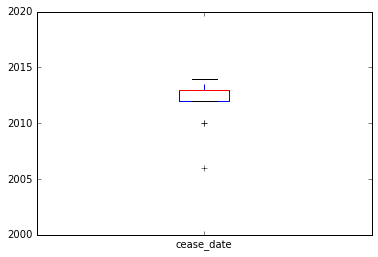

In [25]:
dete_resignations['cease_date'].plot(kind='box', ylim=(2000,2020))

The DETE survey start and cease dates seem to overlap in the 2000s years. The TAFE survey has a wide range of cease date years from 1960s to the 2010s. 

In [26]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head(10)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
12    14.0
14     5.0
16     NaN
20    30.0
21    32.0
Name: institute_service, dtype: float64

The `institute_service` column is used to find the length of time an employee spent at the company before resigning. This could be useful to see if the employee left after a certain amount of time.

Now to group the dissatisfaction factors into a single column:

In [27]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [28]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [29]:
def update_values(n):
    if n == "-":
        return False
    elif pd.isnull(n):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_values).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [30]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [31]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    162
True     149
Name: dissatisfied, dtype: int64

Above, I created a function to update the values and create booleans whether an employee was dissatisfied or not, regardless of reason. This gives a more overall view of how many were dissatisfied versus how many were not, based on each survey.

## Combining the Data

In [32]:
#create a column to distinguish between the two surveys
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [33]:
#combine the two data sets into one
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.head()
# Verify the number of non null values in each column
print(combined.notnull().sum().sort_values())

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
dete_start_date                                        283
role_service                                           290
work_location                                          311
employment_conditions                                  311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
lack_of_job_security                                   311
career_move_to_public_sector                           311
career_move_to_private_sector                          311
workload                                               3

In [34]:
#drop columns that have less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


First, I created a column to distinguish between the two surveys, DETE and TAFE. Then, I combined the datasets with `pd.concat()`. Since there were still columns with an excessive amount of null values, I deleted the columns with less than 500 non-null values to make our data set more compact and include rows with the most significance.

### Clean the institute_service column

There are a variety of different years of service for the institute_service column. We are going to categorize the number of years into these four categories to make conducting analysis easier:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [35]:
#clean up the institute_service column
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [36]:
#convert to string and extract number of years
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In [37]:
def service_map(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3.0:
        return 'New'
    elif 3.0 <= val <= 6.0:
        return 'Experienced'
    elif 7.0 <= val <= 10.0:
        return 'Established'
    else:
        return 'Veteran'

In [38]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(service_map)
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation,7.0,Established
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation,18.0,Veteran
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation,3.0,Experienced
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation,15.0,Veteran
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation,3.0,Experienced


In [39]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

This is a more holistic view of the employees who resigned based on how long they were employed. I created a function to filter out the years based on the list above, and applyed it to the entire data set.

In [40]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [41]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

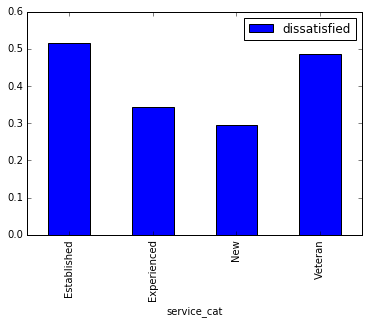

In [42]:
combined_updated_pv = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
combined_updated_pv.plot(kind='bar')

After view the plot that shows the percentage of employees who are dissatisfied and how long they have been in service, it can be concluded that the employees in the 'Established' category (7-10 years) are the ones who are most dissatisfied and decide to resign, followed by the veterans. Maybe after a good while the job becomes boring or unfulfilling, and then they decide to resign.

This answers the first question of: "Are employees who worked for a short period of time resigning due to some kind of dissatisfaction? What about long term employees?"

The long term employees are more likely to resign due to some kind of dissatisfaction.

To answer the second question, "Are younger employees resigning due to some kind of dissatisfaction? What about older employees?",
I need to see what the other null values are, particularly in the age column.

In [43]:
combined_updated.isnull().sum()

age                     55
cease_date              16
dissatisfied             0
employment_status       54
gender                  59
id                       0
institute                0
institute_service       88
position                53
separationtype           0
institute_service_up    88
service_cat             88
dtype: int64

In [44]:
#look at the age column
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

I will repeat the process of grouping the length of service to the ages to easily identify age groups.

In [45]:
#repeat process for the years of service to the age column
combined_updated['age_updated'] = combined_updated['age'].astype('str').str.extract(r'(\d+)')
combined_updated['age_updated'] = combined_updated['age_updated'].astype('float')

#fill na with average age
age_mean = combined_updated['age_updated'].mean()
combined_updated['age_updated'] = combined_updated['age_updated'].fillna(age_mean)
combined_updated['age_updated'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



41.000000    93
46.000000    81
36.000000    73
51.000000    71
26.000000    67
21.000000    62
31.000000    61
39.271812    55
56.000000    55
61.000000    23
20.000000    10
Name: age_updated, dtype: int64

In [46]:
def transform_age(val):
    if pd.isnull(val):
        return np.nan
    elif 20 <= val <= 29:
        return 'young'
    elif 30 <= val <= 40:
        return 'mid age'
    elif 41 <= val <= 50:
        return 'upper mid age'
    else:
        return 'old'

In [47]:
combined_updated['age_cat'] = combined_updated['age_updated'].apply(transform_age)
combined_updated['age_cat'].value_counts()

mid age          189
upper mid age    174
old              149
young            139
Name: age_cat, dtype: int64

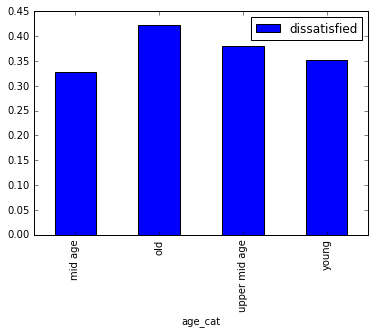

In [48]:
#create pivot table and plot results
age_pv = combined_updated.pivot_table(index='age_cat', values='dissatisfied')
age_pv.plot(kind='bar')

This graphs clearly shows that out of all the age groups, the old age group (50+) are more dissatisfied and likely to resign than the younger age groups, followed by the upper middle age (41-50).

# Conclusions

The goal of cleaning this data was to come up with answers to the questions:

1. Are employees who worked for a short period of time resigning due to some kind of dissatisfaction? What about long term employees?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

After making the data uniform, handling some of the missing values, transforming and combining the data sets, it can be concluded that the **older employees, or the employees who have the longest length of service**, tend to resign due to some kind of dissatisfaction more than the younger, newer employees.

Of course I have only scratched the surface of cleaning the data, and much more can be done and more analysis can also be conducted. I could analyze the data sets separately and see which institute has the most employees resign due to some kind of dissatisfaction. I could also try to handle the rest of the missing values and aggregate according to the service category again to see how many people in each career stage resign due to some kind of dissatisfaction. But this is definitely a great first start!

